In [51]:
import nltk

I will us the 'nltk' download shell to download 'stopwords' (words that have no bearing on the contextual meaning/implication of the sentence or idea being conveyed)

In [52]:
#nltk.download_shell()

In [53]:
messages = [line.rstrip() for line in open('/Users/ugwumsiegbuna/Downloads/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection')]

In [54]:
len(messages)

5574

In [55]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

Just messing around to see how it will look in a Pandas DataFrame

In [56]:
import pandas as pd

message = pd.DataFrame(messages)

In [57]:
message.head()

,0
0,"ham\tGo until jurong point, crazy.. Available ..."
1,ham\tOk lar... Joking wif u oni...
2,spam\tFree entry in 2 a wkly comp to win FA Cu...
3,ham\tU dun say so early hor... U c already the...
4,"ham\tNah I don't think he goes to usf, he live..."


In [58]:
for mess_no,messagee in enumerate(messages[:10]):
    print(mess_no,messagee)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

Using 'read_csv' to read the 'tsv' file into a pandas DataFrame

In [59]:
message = pd.read_csv('/Users/ugwumsiegbuna/Downloads/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/smsspamcollection/SMSSpamCollection',
                     sep='\t',names=['Label','Message'])

In [60]:
message.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
message.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [62]:
message.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [63]:
message['length'] = message['Message'].apply(len)

In [64]:
message.head()

,Label,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Import visualization libraries for visualizations

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

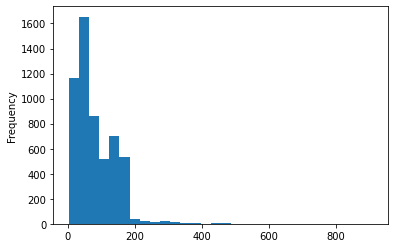

In [66]:
message['length'].plot.hist(bins=30)

In [67]:
message['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [68]:
message[message['length'] == 910]

,Label,Message,length
1085,ham,For me the love should start with attraction.i...,910


In [69]:
message[message['length'] == 910]['Message']

1085    For me the love should start with attraction.i...
Name: Message, dtype: object

In [70]:
message[message['length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

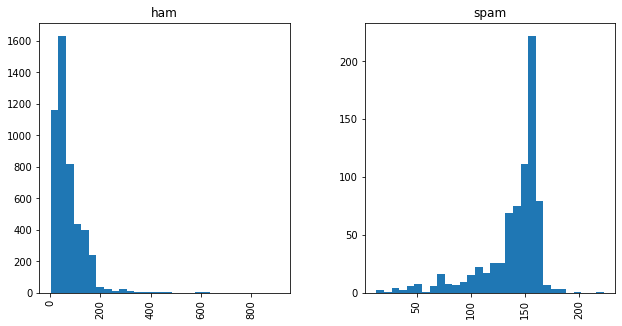

In [71]:
message.hist(column='length',by='Label',bins=30,figsize=(10,5))

In [72]:
import string

mess = 'Simple Message! Notice: It has Punctuation.'

nopunc = [c for c in mess if c not in string.punctuation]

In [73]:
nopunc = ''.join(nopunc)

In [74]:
from nltk.corpus import stopwords

In [75]:
nopunc.split()

['Simple', 'Message', 'Notice', 'It', 'has', 'Punctuation']

In [76]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [77]:
clean_mess 

['Simple', 'Message', 'Notice', 'Punctuation']

In [78]:
def text_process(mess):
    '''
    1) Remove Punctuation
    2) Remove stopwords
    3) Return list of clean text words
    '''
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [79]:
message.head(5)['Message'].apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

Here we begin with the sklearn algorithms

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
bow_vectorizer = CountVectorizer(analyzer=text_process)

In [82]:
bow_vectorizer = bow_vectorizer.fit(message['Message'])

In [83]:
len(bow_vectorizer.vocabulary_)

11425

Now, let's mess with a particular message from our DataFrame

In [84]:
message4 = message['Message'][3]

In [85]:
message4

'U dun say so early hor... U c already then say...'

In [86]:
bow4 = bow_vectorizer.transform([message4])

In [87]:
bow4

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

This shows a matrix containing every single word in the entire 'Bag of Words'(Vocabulary) as he Columns and the very Sentence we are vectorizing as the row, and it shows how many times each word can be found in the particular sentence.

In [88]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


Let's look at the shape of the shape of the sparce matrix generated for 'bow4'

In [89]:
print(bow4.shape)

(1, 11425)


As we can se from the shape of the matrix (1 x 11,425 matrix) shown above, the lone (single row) is the stentence we have vectorized, while the total words in our entire vocabulary is 11,425 which represents the columns. Hence, the sparce matrix produced when you vectorize in NLP is 'messages x words in entire Vocab'.

In [90]:
bow_vectorizer.get_feature_names()[9554]

'say'

Now, Let's vectorize the entire messages in the 'Message' column of our Data Frame

In [91]:
message_bow = bow_vectorizer.transform(message['Message'])

In [92]:
print('Shape of Sparse Matrix:',message_bow.shape)

Shape of Sparse Matrix: (5572, 11425)


Check non-zero occurences

In [93]:
message_bow.nnz

50548

In [97]:
sparsity = (100.0 * message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [98]:
from sklearn.feature_extraction.text import TfidfTransformer

In [99]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [102]:
tfidf4 = tfidf_transformer.transform(bow4)

In [103]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [106]:
tfidf_transformer.idf_[bow_vectorizer.vocabulary_['university']]

8.527076498901426

In [107]:
message_tfidf = tfidf_transformer.transform(message_bow)

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [112]:
spam_detector = MultinomialNB().fit(message_tfidf,message['Label'])

In [113]:
message_train,message_test,label_train,label_test = train_test_split(message['Message'],message['Label'])

Lets use the SciKit Learn Pipeline feature to redo the entire process from the vectorization, but in a much simpler way

In [114]:
from sklearn.pipeline import Pipeline

In [116]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
]).fit(message_train,label_train)

In [117]:
predictions = pipeline.predict(message_test)

In [118]:
predictions

array(['spam', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [120]:
from sklearn.metrics import classification_report,confusion_matrix

In [121]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1217
        spam       1.00      0.74      0.85       176

    accuracy                           0.97      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.97      0.97      1393

